In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
# importing data
train = pd.read_csv("../input/store-sales-time-series-forecasting/train.csv")
test = pd.read_csv("../input/store-sales-time-series-forecasting/test.csv")
holidays = pd.read_csv("../input/store-sales-time-series-forecasting/holidays_events.csv")
transactions = pd.read_csv("../input/store-sales-time-series-forecasting/transactions.csv")

In [3]:
train.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [4]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
transactions.groupby(["date", "store_nbr"]).transactions.sum().to_frame()

transactions
date       store_nbr              
2013-01-01 25                  770
2013-01-02 1                  2111
           2                  2358
           3                  3487
           4                  1922
...                            ...
2017-08-15 50                 2804
           51                 1573
           52                 2255
           53                  932
           54                  802

[83488 rows x 1 columns]

In [6]:
transactions.shape[0]

83488

In [7]:
train[0:4]

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0


In [8]:
train.groupby(["date", "store_nbr"]).sales.sum()

date        store_nbr
2013-01-01  1                0.000000
            2                0.000000
            3                0.000000
            4                0.000000
            5                0.000000
                             ...     
2017-08-15  50           16879.121004
            51           20154.559000
            52           18600.046000
            53            8208.189000
            54           12666.858000
Name: sales, Length: 90936, dtype: float64

In [9]:
train.groupby(["date", "store_nbr"]).sales.sum().to_frame()

sales
date       store_nbr              
2013-01-01 1              0.000000
           2              0.000000
           3              0.000000
           4              0.000000
           5              0.000000
...                            ...
2017-08-15 50         16879.121004
           51         20154.559000
           52         18600.046000
           53          8208.189000
           54         12666.858000

[90936 rows x 1 columns]

In [10]:
merged = train.groupby(["date", "store_nbr"]).sales.sum().to_frame().merge(transactions.groupby(["date", "store_nbr"]).transactions.sum().to_frame(), on=["date","store_nbr"])
merged

sales  transactions
date       store_nbr                            
2013-01-01 25          2511.618999           770
2013-01-02 1           7417.148000          2111
           2          10266.718981          2358
           3          24060.348000          3487
           4          10200.083980          1922
...                            ...           ...
2017-08-15 50         16879.121004          2804
           51         20154.559000          1573
           52         18600.046000          2255
           53          8208.189000           932
           54         12666.858000           802

[83488 rows x 2 columns]

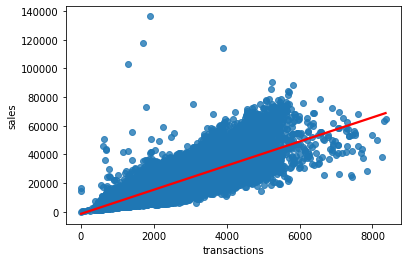

In [11]:
# transactions (examination)
sns.regplot(x="transactions", y="sales", data=merged, line_kws={"color":"red"});

In [12]:
merged.corr("spearman").sales.loc["transactions"]

0.8174644354591597

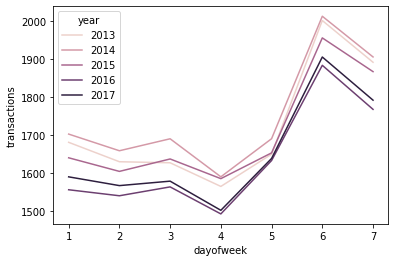

In [13]:
transactions["date"] = pd.to_datetime(transactions.date)
a = transactions.copy()
a["year"] = a.date.dt.year
a["dayofweek"] = a.date.dt.dayofweek+1
a = a.groupby(["year", "dayofweek"]).transactions.mean().reset_index()
sns.lineplot(x="dayofweek", y="transactions", hue="year", data=a);

In [14]:
# Oil Price (Examination)

In [15]:
# importing
oil = pd.read_csv("../input/store-sales-time-series-forecasting/oil.csv")
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [16]:
oil["date"] = pd.to_datetime(oil.date)
oil = oil.set_index("date").dcoilwtico.resample("D").sum().reset_index()
oil

,date,dcoilwtico
0,2013-01-01,0.00
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,0.00
...,...,...
1699,2017-08-27,0.00
1700,2017-08-28,46.40
1701,2017-08-29,46.46
1702,2017-08-30,45.96


In [17]:
# interpolate
oil["dcoilwtico"] = np.where(oil["dcoilwtico"] == 0, np.nan, oil["dcoilwtico"])
oil["dcoilwtico_interpolated"] = oil.dcoilwtico.interpolate()

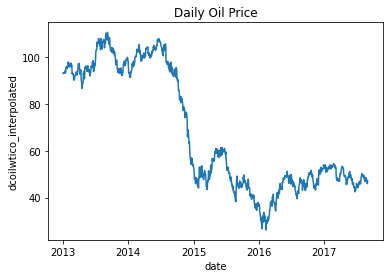

In [18]:
sns.lineplot(x="date", y="dcoilwtico_interpolated", data=oil);
plt.title("Daily Oil Price");

In [19]:
#a = train.set_index("date").groupby("store_nbr").resample("D").sales.sum().reset_index()
#sns.lineplot(x="date", y="sales", hue="store_nbr", data=train[:100000]);

In [20]:
# getting rid of rows that has no sale
print(train.shape)
train = train[~((train.store_nbr == 52) & (train.date < "2017-04-20"))]
train = train[~((train.store_nbr == 22) & (train.date < "2015-10-09"))]
train = train[~((train.store_nbr == 42) & (train.date < "2015-08-21"))]
train = train[~((train.store_nbr == 21) & (train.date < "2015-07-24"))]
train = train[~((train.store_nbr == 29) & (train.date < "2015-03-20"))]
train = train[~((train.store_nbr == 20) & (train.date < "2015-02-13"))]
train = train[~((train.store_nbr == 53) & (train.date < "2014-05-29"))]
train = train[~((train.store_nbr == 36) & (train.date < "2013-05-09"))]
train.shape

(3000888, 6)


(2780316, 6)

In [21]:
b = train.groupby(["store_nbr","family"]).sales.sum().reset_index().sort_values(["family","store_nbr"])
b = b[b.sales == 0]
b

,store_nbr,family,sales
1,1,BABY CARE,0.0
397,13,BABY CARE,0.0
727,23,BABY CARE,0.0
1420,44,BABY CARE,0.0
1453,45,BABY CARE,0.0
1486,46,BABY CARE,0.0
1519,47,BABY CARE,0.0
1552,48,BABY CARE,0.0
1585,49,BABY CARE,0.0
1618,50,BABY CARE,0.0


In [22]:
print(train.shape)

outer_join = train.merge(b.drop("sales", axis=1), how="outer", indicator=True)
outer_join[outer_join._merge=="both"]

(2780316, 6)


,id,date,store_nbr,family,sales,onpromotion,_merge
1684,1,2013-01-01,1,BABY CARE,0.0,0,both
1685,1783,2013-01-02,1,BABY CARE,0.0,0,both
1686,3565,2013-01-03,1,BABY CARE,0.0,0,both
1687,5347,2013-01-04,1,BABY CARE,0.0,0,both
1688,7129,2013-01-05,1,BABY CARE,0.0,0,both
...,...,...,...,...,...,...,...
2777007,2993533,2017-08-11,52,BOOKS,0.0,0,both
2777008,2995315,2017-08-12,52,BOOKS,0.0,0,both
2777009,2997097,2017-08-13,52,BOOKS,0.0,0,both
2777010,2998879,2017-08-14,52,BOOKS,0.0,0,both


In [23]:
train["date"] = pd.to_datetime(train.date)
train = train.set_index("date").reset_index()
train

,date,id,store_nbr,family,sales,onpromotion
0,2013-01-01,0,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,1,BABY CARE,0.000,0
2,2013-01-01,2,1,BEAUTY,0.000,0
3,2013-01-01,3,1,BEVERAGES,0.000,0
4,2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...,...
2780311,2017-08-15,3000883,9,POULTRY,438.133,0
2780312,2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2780313,2017-08-15,3000885,9,PRODUCE,2419.729,148
2780314,2017-08-15,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [24]:
## Time Related Features

In [25]:
# Time Related Features
train = pd.read_csv("../input/store-sales-time-series-forecasting/train.csv",
                   usecols=['store_nbr', 'family', 'date', 'sales', 'onpromotion'],
                    dtype={
                        'store_nbr': 'category',
                        'family': 'category',
                        'sales': 'float32',
                    },
                    parse_dates=['date'],
                    infer_datetime_format=True)

def create_date_features(df):
    df['month'] = df.date.dt.month.astype("int8")
    df['week_of_month'] = (df.date.apply(lambda d: (d.day-1) // 7 + 1)).astype("int8")
    df['day_of_week'] = (df.date.dt.dayofweek + 1).astype("int8")
    df["is_wknd"] = (df.date.dt.weekday // 4).astype("int8")
    df["quarter"] = df.date.dt.quarter.astype("int8")
    #df['is_month_start'] = df.date.dt.is_month_start.astype("int8")
    #df['is_month_end'] = df.date.dt.is_month_end.astype("int8")
    # 0: Winter - 1: Spring - 2: Summer - 3: Fall
    df["season"] = np.where(df.date.dt.month.astype("int8").isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.date.dt.month.astype("int8").isin([6,7,8]), 2, df["season"])
    df["season"] = pd.Series(np.where(df.date.dt.month.astype("int8").isin([9, 10, 11]), 3, df["season"])).astype("int8")
    return df
train = create_date_features(train)

# Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. 
# Supermarket sales could be affected by this.
train["wageday"] = pd.Series(np.where((train.date.dt.is_month_end.astype("int8") == 1) | (train.date.dt.day.astype("int8") == 15), 1, 0)).astype("int8")
train = train.set_index("date")

train

,store_nbr,family,sales,onpromotion,month,week_of_month,day_of_week,is_wknd,quarter,season,wageday
date,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.000000,0,1,1,2,0,1,0,0
2013-01-01,1,BABY CARE,0.000000,0,1,1,2,0,1,0,0
2013-01-01,1,BEAUTY,0.000000,0,1,1,2,0,1,0,0
2013-01-01,1,BEVERAGES,0.000000,0,1,1,2,0,1,0,0
2013-01-01,1,BOOKS,0.000000,0,1,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,9,POULTRY,438.132996,0,8,3,2,0,3,2,1
2017-08-15,9,PREPARED FOODS,154.552994,1,8,3,2,0,3,2,1
2017-08-15,9,PRODUCE,2419.729004,148,8,3,2,0,3,2,1


In [26]:
## Model

In [27]:
train.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=3000888, freq=None)

In [28]:
family_sales = train.groupby(["family","date"]).mean().unstack("family")

In [29]:
# Target Series
y = family_sales.loc[:, "sales"]

# Features for Linear Regression
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(index=y.index, order=1)
X_1 = dp.in_sample()

# Features for XGBoost
X_2 = family_sales.drop("sales", axis=1).stack()

# Label Encoding for "family"
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
X_2 = X_2.reset_index('family')
X_2["family"] = lbe.fit_transform(X_2["family"])

X_2

,family,day_of_week,is_wknd,month,onpromotion,quarter,season,wageday,week_of_month
date,,,,,,,,,
2013-01-01,0,2.0,0.0,1.0,0.000000,1.0,0.0,0.0,1.0
2013-01-01,1,2.0,0.0,1.0,0.000000,1.0,0.0,0.0,1.0
2013-01-01,2,2.0,0.0,1.0,0.000000,1.0,0.0,0.0,1.0
2013-01-01,3,2.0,0.0,1.0,0.000000,1.0,0.0,0.0,1.0
2013-01-01,4,2.0,0.0,1.0,0.000000,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2017-08-15,28,2.0,0.0,8.0,0.111111,3.0,2.0,1.0,3.0
2017-08-15,29,2.0,0.0,8.0,0.166667,3.0,2.0,1.0,3.0
2017-08-15,30,2.0,0.0,8.0,58.685185,3.0,2.0,1.0,3.0


In [30]:
y.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1684, freq=None)

In [31]:
#y = y.to_frame()
family_sales.stack()

sales  onpromotion  month  \
date       family                                                        
2013-01-01 AUTOMOTIVE                     0.000000     0.000000    1.0   
           BABY CARE                      0.000000     0.000000    1.0   
           BEAUTY                         0.037037     0.000000    1.0   
           BEVERAGES                     15.000000     0.000000    1.0   
           BOOKS                          0.000000     0.000000    1.0   
...                                            ...          ...    ...   
2017-08-15 POULTRY                      325.679810     0.111111    8.0   
           PREPARED FOODS                85.954132     0.166667    8.0   
           PRODUCE                     2316.832764    58.685185    8.0   
           SCHOOL AND OFFICE SUPPLIES    46.851852     2.740741    8.0   
           SEAFOOD                       17.966240     0.000000    8.0   

                                       week_of_month  day_of_week  is_wknd  \
date       family                                                            
2013-01-01 AUTOMOTIVE                            1.0          2.0      0.0   
           BABY CARE                             1.0          2.0      0.0   
           BEAUTY                                1.0          2.0      0.0   
           BEVERAGES                             1.0          2.0      0.0   
           BOOKS                                 1.0          2.0      0.0   
...                                              ...          ...      ...   
2017-08-15 POULTRY                               3.0          2.0      0.0   
           PREPARED FOODS                        3.0          2.0      0.0   
           PRODUCE                               3.0          2.0      0.0   
           SCHOOL AND OFFICE SUPPLIES            3.0          2.0      0.0   
           SEAFOOD                               3.0          2.0      0.0   

                                       quarter  season  wageday  
date       family                                                
2013-01-01 AUTOMOTIVE                      1.0     0.0      0.0  
           BABY CARE                       1.0     0.0      0.0  
           BEAUTY                          1.0     0.0      0.0  
           BEVERAGES                       1.0     0.0      0.0  
           BOOKS                           1.0     0.0      0.0  
...                                        ...     ...      ...  
2017-08-15 POULTRY                         3.0     2.0      1.0  
           PREPARED FOODS                  3.0     2.0      1.0  
           PRODUCE                         3.0     2.0      1.0  
           SCHOOL AND OFFICE SUPPLIES      3.0     2.0      1.0  
           SEAFOOD                         3.0     2.0      1.0  

[55572 rows x 9 columns]

In [32]:
y_train, y_valid = y[:"2017-07-01"], y["2017-07-02":]
X1_train, X1_valid = X_1[:"2017-07-01"], X_1["2017-07-02":]
X2_train, X2_valid = X_2[:"2017-07-01"], X_2["2017-07-02":]

In [33]:
y.head()

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.000000,0.0,0.037037,15.000000,0.0,3.344241,0.0,3.444444,2.648148,1.316481,...,0.0,2.051870,0.462963,0.0,0.0,0.789574,0.700870,0.0,0.0,0.000000
2013-01-02,4.722222,0.0,3.833333,1335.036987,0.0,486.042938,0.0,1382.018555,432.981476,291.750000,...,0.0,386.508606,318.592590,0.0,0.0,258.812683,98.853928,0.0,0.0,28.273148
2013-01-03,2.981482,0.0,2.314815,964.907410,0.0,341.786682,0.0,1035.055542,333.351837,206.897308,...,0.0,307.359222,232.740738,0.0,0.0,197.673965,66.507187,0.0,0.0,20.265018
2013-01-04,3.129630,0.0,2.462963,1003.092590,0.0,309.666077,0.0,964.148132,336.074066,187.837204,...,0.0,400.480804,209.314819,0.0,0.0,199.491013,82.832703,0.0,0.0,23.946686
2013-01-05,6.333333,0.0,3.537037,1441.074097,0.0,414.217804,0.0,1298.666626,427.444458,254.350830,...,0.0,386.649841,311.462952,0.0,0.0,249.537201,107.964317,0.0,0.0,23.067352


In [34]:
# model1
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge

#model2
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
model_1 = LinearRegression()
model_2 = KNeighborsRegressor()

In [35]:
# fit
model_1.fit(X1_train, y_train)
y_fit = pd.DataFrame(model_1.predict(X1_train), index=X1_train.index, columns=y_train.columns)

y_resid = y - y_fit
y_resid = y_resid.stack().squeeze()

model_2.fit(X2_train, y_resid)


KNeighborsRegressor()

In [36]:
# predict (train)

y_pred = pd.DataFrame(model_1.predict(X1_train), index = X1_train.index, columns = y_train.columns)
y_pred = y_pred.stack().squeeze()
y_pred += model_2.predict(X2_train)

y_fit = y_pred.unstack()

In [37]:
model_2.predict(X2_train).shape

(54087,)

In [38]:
# predict (valid)

y_pred = pd.DataFrame(model_1.predict(X1_valid), index = X1_valid.index, columns = y_valid.columns)
y_pred = y_pred.stack().squeeze()
y_pred += model_2.predict(X2_valid)

y_pred = y_pred.unstack()

In [39]:
y_pred.stack()

date        family                    
2017-07-02  AUTOMOTIVE                      11.252574
            BABY CARE                        0.321099
            BEAUTY                         399.678125
            BEVERAGES                     4237.303755
            BOOKS                            0.175840
                                             ...     
2017-08-15  POULTRY                        394.483437
            PREPARED FOODS                  94.439962
            PRODUCE                       2505.148542
            SCHOOL AND OFFICE SUPPLIES     -31.135223
            SEAFOOD                         20.435354
Length: 1485, dtype: float64

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


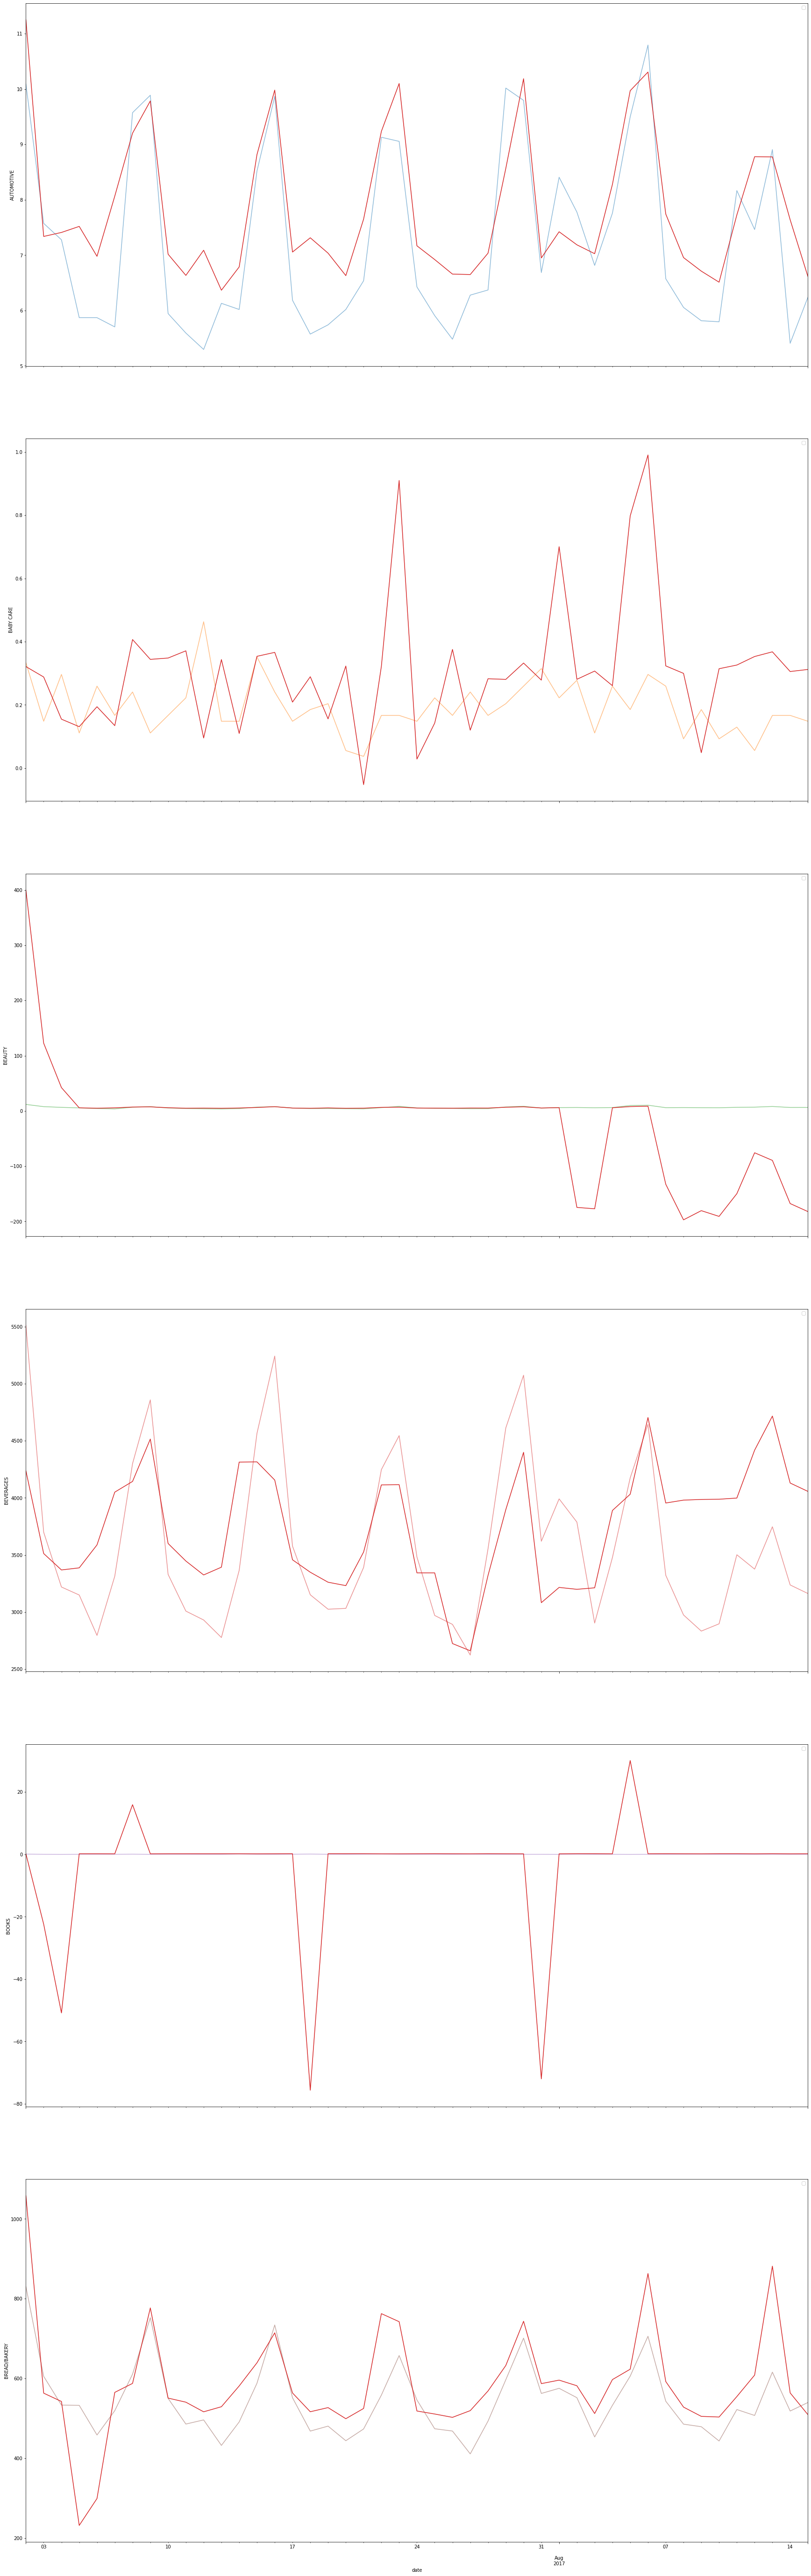

In [40]:
import matplotlib.pyplot as plt
families = y.columns[0:6]
axs = y_valid.loc(axis=1)[families].plot(
    subplots=True, sharex=True, figsize=(30, 100), alpha=0.5,
)
#_ = y_fit.loc(axis=1)[families].plot(subplots=True, sharex=True, color='C0', ax=axs)
_ = y_pred.loc(axis=1)[families].plot(subplots=True, sharex=True, color='C3', ax=axs)
for ax, family in zip(axs, families):
    ax.legend([])
    ax.set_ylabel(family);

In [41]:
test = pd.read_csv("../input/store-sales-time-series-forecasting/test.csv",
                   usecols=['store_nbr', 'family', 'date', 'onpromotion'],
                    dtype={
                        'store_nbr': 'category',
                        'family': 'category',
                    },
                    parse_dates=['date'],
                    infer_datetime_format=True)

test = create_date_features(test)
test["wageday"] = pd.Series(np.where((test.date.dt.is_month_end.astype("int8") == 1) | (test.date.dt.day.astype("int8") == 15), 1, 0)).astype("int8")

In [42]:
test["date"] = pd.to_datetime(test.date)
test = test.set_index("date")
test

,store_nbr,family,onpromotion,month,week_of_month,day_of_week,is_wknd,quarter,season,wageday
date,,,,,,,,,,
2017-08-16,1,AUTOMOTIVE,0,8,3,3,0,3,2,0
2017-08-16,1,BABY CARE,0,8,3,3,0,3,2,0
2017-08-16,1,BEAUTY,2,8,3,3,0,3,2,0
2017-08-16,1,BEVERAGES,20,8,3,3,0,3,2,0
2017-08-16,1,BOOKS,0,8,3,3,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...
2017-08-31,9,POULTRY,1,8,5,4,0,3,2,1
2017-08-31,9,PREPARED FOODS,0,8,5,4,0,3,2,1
2017-08-31,9,PRODUCE,1,8,5,4,0,3,2,1


In [43]:
test["family"] = lbe.fit_transform(test["family"])

In [44]:
test.index

DatetimeIndex(['2017-08-16', '2017-08-16', '2017-08-16', '2017-08-16',
               '2017-08-16', '2017-08-16', '2017-08-16', '2017-08-16',
               '2017-08-16', '2017-08-16',
               ...
               '2017-08-31', '2017-08-31', '2017-08-31', '2017-08-31',
               '2017-08-31', '2017-08-31', '2017-08-31', '2017-08-31',
               '2017-08-31', '2017-08-31'],
              dtype='datetime64[ns]', name='date', length=28512, freq=None)

In [45]:
test.groupby(["family","date"]).mean().unstack("family")

onpromotion                                                 \
family              0         1         2          3    4          5    
date                                                                    
2017-08-16    0.000000  0.000000  2.000000  31.592593  0.0  13.944444   
2017-08-17    0.000000  0.000000  0.851852  18.759259  0.0   8.148148   
2017-08-18    0.000000  0.000000  0.888889  18.777778  0.0   9.166667   
2017-08-19    0.000000  0.018519  1.000000  20.203704  0.0   9.314815   
2017-08-20    0.018519  0.000000  0.944444  20.574074  0.0  32.000000   
2017-08-21    0.000000  0.000000  0.981481  19.333333  0.0   9.518519   
2017-08-22    0.000000  0.000000  0.888889  18.129630  0.0   9.666667   
2017-08-23    0.000000  0.000000  0.870370  23.111111  0.0  11.296296   
2017-08-24    0.018519  0.000000  0.462963  26.351852  0.0   6.407407   
2017-08-25    0.000000  0.000000  0.592593  27.981481  0.0   6.574074   
2017-08-26    0.018519  0.000000  0.592593  28.370370  0.0   6.740741   
2017-08-27    0.000000  0.000000  0.666667  29.611111  0.0  33.537037   
2017-08-28    0.037037  0.000000  0.555556  27.203704  0.0   7.203704   
2017-08-29    0.000000  0.000000  0.537037  26.537037  0.0   6.370370   
2017-08-30    0.129630  0.000000  0.537037  43.037037  0.0   9.296296   
2017-08-31    0.129630  0.000000  0.555556  34.888889  0.0   7.666667   

                                                       ... wageday            \
family            6          7          8          9   ...      23   24   25   
date                                                   ...                     
2017-08-16  0.000000  26.888889  84.759259  18.055556  ...     0.0  0.0  0.0   
2017-08-17  0.018519  13.425926  12.277778   6.462963  ...     0.0  0.0  0.0   
2017-08-18  0.000000  14.518519  16.037037  55.222222  ...     0.0  0.0  0.0   
2017-08-19  0.037037  16.055556  16.611111   7.611111  ...     0.0  0.0  0.0   
2017-08-20  0.000000  15.814815  16.425926   7.870370  ...     0.0  0.0  0.0   
2017-08-21  0.000000  15.037037  15.925926   7.555556  ...     0.0  0.0  0.0   
2017-08-22  0.018519  14.166667  16.166667   7.462963  ...     0.0  0.0  0.0   
2017-08-23  0.018519  16.222222  64.277778   7.703704  ...     0.0  0.0  0.0   
2017-08-24  0.000000  14.944444   8.574074   7.500000  ...     0.0  0.0  0.0   
2017-08-25  0.018519  14.907407   9.518519  53.870370  ...     0.0  0.0  0.0   
2017-08-26  0.000000  16.944444  10.074074   8.037037  ...     0.0  0.0  0.0   
2017-08-27  0.000000  17.240741  10.555556   7.962963  ...     0.0  0.0  0.0   
2017-08-28  0.000000  16.481481  10.259259   7.407407  ...     0.0  0.0  0.0   
2017-08-29  0.037037  16.111111  11.666667   7.462963  ...     0.0  0.0  0.0   
2017-08-30  0.203704  25.740741  62.018519  10.166667  ...     0.0  0.0  0.0   
2017-08-31  0.148148  20.203704  13.685185   8.333333  ...     1.0  1.0  1.0   

                                               
family       26   27   28   29   30   31   32  
date                                           
2017-08-16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-21  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-22  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-24  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-29  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-30  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-08-31  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[16 rows x 264 columns]

In [46]:
test = test.drop("store_nbr", axis=1)

In [47]:
# submission (fit)
model_1.fit(X_1, y)
y_fit = pd.DataFrame(model_1.predict(X_1), index=X_1.index, columns=y_valid.columns)

y_resid = y - y_fit
y_resid = y_resid.stack().squeeze()

model_2.fit(X_2, y_resid)

KNeighborsRegressor()

In [48]:
# submission (predict)
X1_new = dp.out_of_sample(steps=28512)

y_pred = pd.DataFrame(model_1.predict(X1_new), index = X1_new.index, columns = y_valid.columns) 
#y_pred = y_pred.stack().squeeze()
cols = y_pred.columns
y_pred["sum1"] = y_pred.sum(axis=1)
y_pred = y_pred.drop(cols, axis=1).reset_index()

a = pd.DataFrame(model_2.predict(test), columns=["sum2"]).reset_index()

y_pred["sum2"] = a["sum2"]
y_pred["sum"] = y_pred.sum(axis=1)
y_pred = y_pred.drop(["sum1","sum2"], axis=1)
y_pred

#y_pred = y_pred.unstack()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:157: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


family,index,sum
0,1685,18894.564603
1,1686,18902.102749
2,1687,18717.024416
3,1688,18967.857689
4,1689,18715.274969
...,...,...
28507,30192,230236.070151
28508,30193,230254.578710
28509,30194,230267.777572
28510,30195,230846.790082


In [49]:
sub = pd.read_csv("../input/store-sales-time-series-forecasting/sample_submission.csv")
sub

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [50]:
sub["sales"] = y_pred["sum"]
sub.clip(0.0)
sub = pd.DataFrame(sub).set_index("id")

In [51]:
sub

,sales
id,
3000888,18894.564603
3000889,18902.102749
3000890,18717.024416
3000891,18967.857689
3000892,18715.274969
...,...
3029395,230236.070151
3029396,230254.578710
3029397,230267.777572


In [52]:
sub.to_csv('./submission.csv')